In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

%matplotlib inline
from matplotlib import pyplot as plt

# import matplotlib.pyplot
from os import getcwd
getcwd()

'C:\\Users\\Alec\\Documents\\Programming_Resources\\Boot_Camp\\project-04\\CISautoData\\ipynb'

In [2]:
# data = pd.read_csv('https://raw.githubusercontent.com/HendersonAlec2212/project_04/main/csv/PICKUP_DATA_CLEAN.csv', low_memory=False)
df = pd.read_csv('../csv/SUV_DATA_CLEAN.csv')

In [3]:
df.head()

,body_class,brand_name,model_name,model_ID,model_year,mileage,ask_price,msrp,color,engine_cylinders,fuel_type_primary,vin
0,suv,JEEP,Wrangler,1943.0,2017.0,9642,39962,39962,Black Clearcoat,6.0,Gasoline,322d48b4c60b477e2f9ed6b702a04e79de7a7fa2896521...
1,suv,JEEP,Grand Cherokee,1949.0,2015.0,50460,32962,32962,Cashmere Pearlcoat,8.0,Gasoline,2ef50172db46389b72f4e99178a8e7711de2adf0658249...
2,suv,JEEP,Wrangler JK,25197.0,2018.0,5844,35962,35962,Firecracker Red Clearcoat,6.0,Gasoline,6cb1784ba994af798c878b3f0d5270e893d8605cf47f94...
3,suv,FORD,Escape,1798.0,2016.0,32026,18962,18962,Ruby Red Metallic Tinted Clearcoat,4.0,Gasoline,8ee60b54b5fba668f4766d4209b6aabedf3ea10a703fe2...
4,suv,JEEP,Cherokee,1945.0,2017.0,7958,23462,23462,Diamond Black Crystal Pearlcoat,6.0,Gasoline,1ed760e28dc35ab6945f53a563f9cbcf894ff39c3b8dde...


In [4]:
depth = 7
model_results = {}
train_score_list = []
test_score_list = []
df_test = df.drop(columns=['msrp','vin','color'])
#names for each DF/ Model to be trained


# divide the data
X = df_test.drop(columns=['ask_price'])
y = df_test['ask_price']

# set dummies
X_dummies = pd.get_dummies(X,drop_first=True)

# split for test and train
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=42)

# model parameters
model = RandomForestRegressor(max_depth=depth,n_estimators=100, random_state=12)

# fit the model to the data
model.fit(X_train, y_train)

# evaluate scores and predictions
train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

train_score = model.score(X_train,y_train,sample_weight=None)
test_score = model.score(X_test,y_test,sample_weight=None)

# record results

model_results['model'] = model

model_results['train_y_pred'] = train_predicted
model_results['test_y_pred'] = test_predicted

model_results['train_score']  = train_score
model_results['test_score']  = test_score

train_score_list.append(train_score)
test_score_list.append(test_score)


In [5]:
model_results['columns'] = X_train.columns.to_list()

In [6]:
model_results

{'model': RandomForestRegressor(max_depth=7, random_state=12),
 'train_y_pred': array([33064.89359899, 14367.30398335, 12072.01476106, ...,
        17205.3672203 , 26438.15433215, 16895.01500278]),
 'test_y_pred': array([35917.67974687, 28864.993816  , 20333.32813327, ...,
        36916.66723994, 14276.76614795, 29191.55905604]),
 'train_score': 0.8394327115256128,
 'test_score': 0.8381622398033894,
 'columns': ['model_ID',
  'model_year',
  'mileage',
  'engine_cylinders',
  'brand_name_ALFA ROMEO',
  'brand_name_AUDI',
  'brand_name_BMW',
  'brand_name_BUICK',
  'brand_name_CADILLAC',
  'brand_name_CHEVROLET',
  'brand_name_CHRYSLER',
  'brand_name_DODGE',
  'brand_name_FIAT',
  'brand_name_FORD',
  'brand_name_GMC',
  'brand_name_HONDA',
  'brand_name_HUMMER',
  'brand_name_ISUZU',
  'brand_name_JAGUAR',
  'brand_name_JEEP',
  'brand_name_KIA',
  'brand_name_LAND ROVER',
  'brand_name_LEXUS',
  'brand_name_LINCOLN',
  'brand_name_MASERATI',
  'brand_name_MAZDA',
  'brand_name_MERCED

In [8]:
# save the model
model = model_results['model']
joblib.dump(model,'../models/suv_depth_7_838_no_color.joblib')

['../models/suv_depth_7_838_no_color.joblib']

In [9]:
loaded_model = joblib.load('../models/suv_depth_7_838_no_color.joblib')

In [10]:
loaded_model.score(X_test,y_test,sample_weight=None)

0.8381622398033894

In [11]:
loaded_model.predict(X_test)

array([35917.67974687, 28864.993816  , 20333.32813327, ...,
       36916.66723994, 14276.76614795, 29191.55905604])

In [12]:
model_results['test_y_pred']

array([35917.67974687, 28864.993816  , 20333.32813327, ...,
       36916.66723994, 14276.76614795, 29191.55905604])

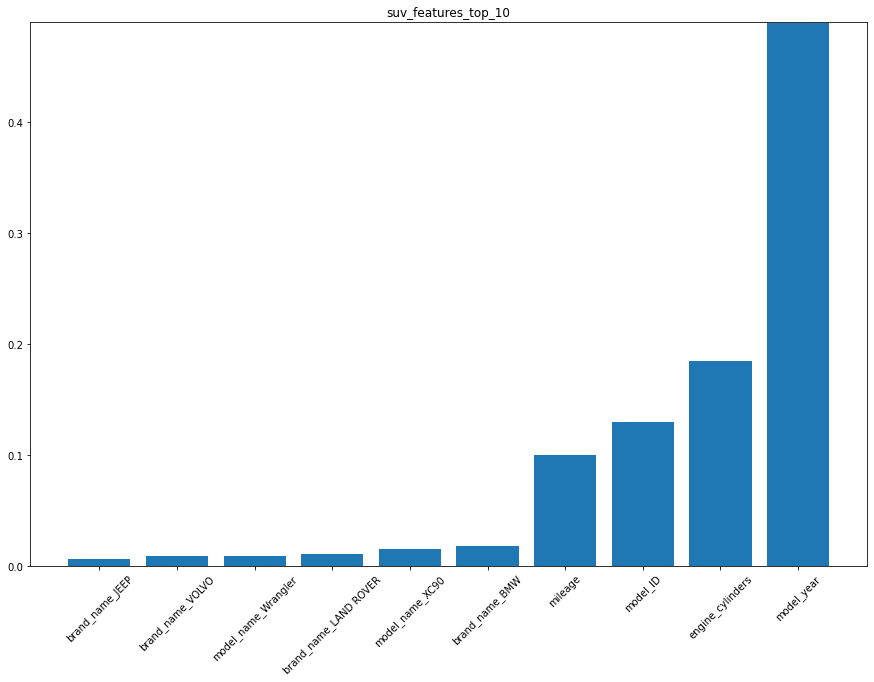

In [15]:
feature_importances = model.feature_importances_
features = sorted(zip(X_test.columns, model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features[-10:]]
width = [f[1] for f in features[-10:]]

fig, ax = plt.subplots()

fig.set_size_inches(15,10)
plt.margins(y=0.001)

plt.bar(x=cols, height=width)
plt.title('suv_features_top_10')
plt.xticks(rotation=45)
plt.savefig('../visualizations/suv_top_10_cols.png')
plt.show()


In [16]:
print(model_results['columns'])

['model_ID', 'model_year', 'mileage', 'engine_cylinders', 'brand_name_ALFA ROMEO', 'brand_name_AUDI', 'brand_name_BMW', 'brand_name_BUICK', 'brand_name_CADILLAC', 'brand_name_CHEVROLET', 'brand_name_CHRYSLER', 'brand_name_DODGE', 'brand_name_FIAT', 'brand_name_FORD', 'brand_name_GMC', 'brand_name_HONDA', 'brand_name_HUMMER', 'brand_name_ISUZU', 'brand_name_JAGUAR', 'brand_name_JEEP', 'brand_name_KIA', 'brand_name_LAND ROVER', 'brand_name_LEXUS', 'brand_name_LINCOLN', 'brand_name_MASERATI', 'brand_name_MAZDA', 'brand_name_MERCEDES-BENZ', 'brand_name_MERCURY', 'brand_name_MINI', 'brand_name_MITSUBISHI', 'brand_name_PONTIAC', 'brand_name_PORSCHE', 'brand_name_SAAB', 'brand_name_SATURN', 'brand_name_SUBARU', 'brand_name_SUZUKI', 'brand_name_TOYOTA', 'brand_name_VOLKSWAGEN', 'brand_name_VOLVO', 'model_name_500X', 'model_name_9-4x', 'model_name_9-7X', 'model_name_A4 allroad', 'model_name_Acadia', 'model_name_Accord Crosstour', 'model_name_Ascent', 'model_name_Aspen', 'model_name_Atlas', 'mod